# Cleaning data in Python

## Data type constraints

Numeric data or other type?

In [40]:
import pandas as pd

ride_sharing = pd.read_csv('files/ride_sharing_original.csv')

# Print the information of ride_sharing
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


The user_type column contains information on whether a user is taking a free ride and takes on the following values:
1. for free riders.
2. for pay per ride.
3. for monthly subscribers.

In [41]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [39]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


Duration is a string with "minutes" at the end.

We need to convert it to a numeric type.

In [42]:
# Strip duration of minutes
ride_sharing['duration_time'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_time'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration  duration_time
0      12 minutes             12
1      24 minutes             24
2       8 minutes              8
3       4 minutes              4
4      11 minutes             11
...           ...            ...
25755  11 minutes             11
25756  10 minutes             10
25757  14 minutes             14
25758  14 minutes             14
25759  29 minutes             29

[25760 rows x 2 columns]
11.389052795031056


## Data range constraints

**Tire size constraints**

Bicycle tire sizes are correctly loaded as a categorical value.

In [43]:
import pandas as pd

ride_sharing = pd.read_csv('files/ride_sharing.csv', dtype={'tire_size':'category'})

ride_sharing['tire_size'].dtype.name

'category'

Bicycle tire sizes could be either 26″, 27″ or 29″.

In [44]:
ride_sharing['tire_size'].value_counts()

27    8679
26    8627
29    8454
Name: tire_size, dtype: int64

The ride sharing provider decided to set the maximum tire size to be 27″.

You can make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

In [45]:
# Convert tire_sizes to integer
ride_sharing['tire_size'] = ride_sharing['tire_size'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_size'] > 27, 'tire_size'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_size'] = ride_sharing['tire_size'].astype('category')

# Print tire size description
print(ride_sharing['tire_size'].dtype)

# Print tire size value counts
print(ride_sharing['tire_size'].value_counts())

category
27    17133
26     8627
Name: tire_size, dtype: int64


Let's introduce a random ride date column to the data, and a bug with dates set in the future.

In [46]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np

ride_sharing = pd.read_csv('files/ride_sharing_original.csv')

today = datetime.today()
today_last_year = today - relativedelta(years=1)
# Introducing a future date bug
today_next_month = today + relativedelta(months=1)

ride_sharing['ride_dt'] = np.random.choice(pd.date_range(today_last_year, today_next_month), size=ride_sharing.shape[0])
ride_sharing['ride_dt'].describe(datetime_is_numeric=True)

count                            25760
mean     2022-06-13 14:01:32.362923776
min         2021-11-28 16:02:57.331868
25%      2022-03-07 16:02:57.331867904
50%      2022-06-12 16:02:57.331867904
75%      2022-09-19 16:02:57.331867904
max         2022-12-28 16:02:57.331868
Name: ride_dt, dtype: object

Let's save the data to a new file.

In [87]:
ride_sharing.to_csv('files/ride_sharing_bugged.csv', index=False, date_format='%Y-%m-%d')

Reloading the dataframe, date is now a string

In [88]:
import datetime as dt

import pandas as pd
import numpy as np

ride_sharing = pd.read_csv('files/ride_sharing_bugged.csv')

ride_sharing['ride_dt'].describe()

count          25760
unique           396
top       2022-04-12
freq              91
Name: ride_dt, dtype: object

In [89]:
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_dt']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2022-11-27


## Uniqueness constraints

### Duplicate values

* All columns have the same values

| first_name | last_name | address | height | weight |
| --- | --- | --- | --- | --- |
| Justin | Saddlemyer | Boulevard du Jardin Botanique 3, Bruxelles | 193 cm | 87 kg |
| Justin | Saddlemyer | Boulevard du Jardin Botanique 3, Bruxelles | 193 cm | 87 kg |

* Most columns have the same values

| first_name | last_name | address | height | weight |
| --- | --- | --- | --- | --- |
| Justin | Saddlemyer | Boulevard du Jardin Botanique 3, Bruxelles | 193 cm | 87 kg |
| Justin | Saddlemyer | Boulevard du Jardin Botanique 3, Bruxelles | **194 cm** | 87 kg |

### Finding duplicates

In [90]:
import pandas as pd

ride_sharing = pd.read_csv('files/ride_sharing.csv')

# Find duplicates
duplicates = ride_sharing.duplicated('ride_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration_time','user_birth_year']])

     ride_id  duration_time  user_birth_year
20        20             16             1998
37        20              2             1998
55        55             11             1999
76        55             11             2099
101      101             10             1990
126      101             10             1990


### Treating duplicates

* user_birth_year: set to the minimum value
* duration: set to the mean value

In [93]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_time': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## Membership constraints

### Categories and membership constraints

**Predefined finite set of categories**

| Type of data | Example values | Numeric representation |
| --- | --- | --- |
| Marriage Status | unmarried, married * | 0, 1 |
| Household Income Category | 0-20K, 20-40K, ... | 0, 1, ... |
| Loan Status | default, payed, no_loan | 0, 1, 2 |

<sub>* Marriage status can only be unmarried _or_ married</sub>

Generating random data for analysis

In [192]:
import csv
from faker import Faker
import datetime

def generate_data(records, headers):
    # Z+ doesn't exist, we're introducing a bug
    blood_types = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-', 'Z+']
    marriage_status = ['married', 'unmarried' , 'Married', 'Unmarried', 'MARRIED', 'UNMARRIED', 'M', 'U', ' married', ' unmarried ']

    fake = Faker('pt_BR')

    with open("files/people.csv", 'wt') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for i in range(records):
            writer.writerow(
                {
                    "id" : i,
                    "prefix" : fake.prefix(),
                    "name": fake.name(),
                    "birth_date" : fake.date(pattern="%Y-%m-%d", end_datetime=datetime.date(2000, 1,1)),
                    "blood_type" : fake.random_element(elements=blood_types),
                    "marriage_status": fake.random_element(elements=marriage_status),
                    "household_income": fake.pyfloat(left_digits=6, right_digits=2, positive=True),
                    "phone_number" : fake.phone_number(),
                    "email": fake.email(),
                    "address" : fake.address(),
                    "zip_code" : fake.postcode(),
                    "city" : fake.city(),
                    "state" : fake.state(),
                    "country" : fake.country(),
                    "year": fake.year(),
                    "time": fake.time(),
                    "url": fake.url(),
                    "text": fake.word(),
                }
            )
    

records = 1000
headers = ["id", "prefix", "name", "birth_date", "blood_type", "marriage_status", "household_income", "phone_number", "email",
            "address", "zip_code", "city", "state", "country", "year", "time", "url", "text"]
generate_data(records, headers)

#### Loading data

In [94]:
import pandas as pd

people = pd.read_csv('files/people.csv', index_col='id')

people.head()

,prefix,name,birth_date,blood_type,marriage_status,household_income,phone_number,email,address,zip_code,city,state,country,year,time,url,text
id,,,,,,,,,,,,,,,,,
0,Srta.,Dr. Luiz Otávio Almeida,1973-08-07,B-,Unmarried,463489.60,71 3791-5556,qsilveira@example.com,"Conjunto Lorenzo da Conceição, 87\nCdi Jatoba\...",22865-027,Gonçalves,Alagoas,Peru,2010,12:20:42,https://www.freitas.com/,vel
1,Sra.,Dr. Thales Gonçalves,1995-12-15,O+,Married,392673.57,+55 (071) 6127 1429,luiz-gustavo37@example.com,"Quadra de Castro, 4\nSanta Sofia\n53341823 Cos...",57203402,Cardoso,Sergipe,Hong Kong,2014,05:58:00,http://www.peixoto.br/,fuga
2,Srta.,Kamilly Cavalcanti,1970-01-29,A+,married,109618.71,+55 (011) 6732 2717,lcosta@example.com,"Alameda de Oliveira, 110\nÁlvaro Camargos\n572...",25934717,Alves Verde,Mato Grosso do Sul,Emirados Árabes Unidos,1998,04:21:55,http://da.com/,sapiente
3,Sra.,Helena Novaes,1996-09-04,B+,UNMARRIED,855947.78,+55 (071) 3303-6839,kdias@example.com,"Chácara Anthony Moreira, 623\nVila Copasa\n247...",26235761,da Cruz das Pedras,Espírito Santo,Dhekelia,1992,19:01:04,http://www.costa.br/,aspernatur
4,Sra.,Maysa Barbosa,1994-03-08,O-,married,261893.78,0300 635 4403,juan43@example.net,"Fazenda Ramos, 17\nSatelite\n86965596 Ferreira...",58039-052,Carvalho,Santa Catarina,Japão,1990,22:10:49,http://www.barros.com/,nesciunt


In [96]:
people['blood_type'].value_counts()

B+     125
AB+    121
O-     118
AB-    117
B-     109
A+     108
A-     105
O+     102
Z+      95
Name: blood_type, dtype: int64

#### Finding inconsistent categories

In [97]:
# Correct blood types
blood_types = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']
categories = pd.DataFrame(blood_types)
categories.columns = ['blood_type']

inconsistent_categories = set(people['blood_type']).difference(categories['blood_type'])
print(inconsistent_categories)

{'Z+'}


#### Dropping inconsistent categories

In [98]:
inconsistent_categories = set(people['blood_type']).difference(categories['blood_type'])
inconsistent_rows = people['blood_type'].isin(inconsistent_categories)
inconsistent_data = people[inconsistent_rows]
# Drop inconsistent categories and get consistent data only
consistent_data = people[~inconsistent_rows]

Types of consistency errors
1. Value inconsistency
   * Inconsistent fields: `'married'`, `'Maried'`, `'UNMARRIED'`, `'not married'`...
   * _Trailing white spaces: `'_married'` , `' married '` ..;
2. Collapsing too many categories to few
   * Creating new groups: `0-20K`, `20-40K` categories ... from continuous household income data
   * Mapping groups to new ones: Mapping household income categories to 2 `'rich'` , `'poor'`
3. Making sure data is of type `category`

In [99]:
import pandas as pd

people = pd.read_csv('files/people.csv', index_col='id')

# Get marriage status column
marriage_status = people['marriage_status']
marriage_status.value_counts()

 married       111
UNMARRIED      110
Married        109
Unmarried      104
MARRIED        103
 unmarried     102
U               99
married         95
unmarried       87
M               80
Name: marriage_status, dtype: int64

#### Fixing inconsistent values

In [100]:
import pandas as pd

people = pd.read_csv('files/people.csv', index_col='id')

# Fix upper and lowercase
people['marriage_status'] = people['marriage_status'].str.lower()

# Fixing leading and trailing spaces
people['marriage_status'] = people['marriage_status'].str.strip()

# Fixing incorrect values
people.loc[people["marriage_status"] == "m", "marriage_status"] = "married"
people.loc[people["marriage_status"] == "u", "marriage_status"] = "unmarried"

people['marriage_status'].value_counts()

unmarried    502
married      498
Name: marriage_status, dtype: int64

#### Collapsing data into categories
Create categories out of data: income_group column from income column

In [101]:
import pandas as pd
import numpy as np

people = pd.read_csv('files/people.csv', index_col='id')

# Using cut) - create category ranges and names
ranges = [0, 200000, 500000, np.inf]
group_names = ['0-20K', '20K-50K', '50K+']

# Create income group column
people['income_group'] = pd.cut(people['household_income'], bins=ranges, labels=group_names)
people['income_group'].value_counts()

50K+       486
20K-50K    313
0-20K      201
Name: income_group, dtype: int64

### Collapsing data into categories

**Map categories to fewer ones**: reducing categories in categorical column.

operating_system column is: `'Microsoft'`, `'MacOS'`, `'Linux'`, `'IOS'`, `'Android'`

operating_system column should become: `'DesktopOS'`, `'MobileOS'`

In [103]:
import pandas as pd
import numpy as np

from faker import Faker

fake = Faker('pt_BR')

operating_systems = ['Windows', 'MacOS', 'Linux', 'Android', 'iOS']

users = pd.DataFrame(columns=['id', 'name', 'email', 'os'])

for i in range(100):
    users.loc[i] = [i, fake.name(), fake.email(), fake.random_element(elements=operating_systems)]

users.head()

,id,name,email,os
0,0,Camila Castro,souzayuri@example.net,Linux
1,1,Rodrigo Alves,joao-pedro39@example.com,Android
2,2,Rebeca da Costa,alicia46@example.net,Windows
3,3,Dr. Danilo Barros,danielafarias@example.com,MacOS
4,4,Matheus Lopes,aragaoarthur@example.net,MacOS


Current values in the operating_system column

In [104]:
users['os'].unique()

array(['Linux', 'Android', 'Windows', 'MacOS', 'iOS'], dtype=object)

Remapping values in the operating_system column

In [105]:
# Create mapping dictionary and replace
mapping = {
    'Windows': 'DesktopOS',
    'MacOS': 'DesktopOS',
    'Linux': 'DesktopOS',
    'iOS': 'MobileOS',
    'Android':'MobileOS'
}
users['os'] = users['os'].replace(mapping)
users['os'].unique()

array(['DesktopOS', 'MobileOS'], dtype=object)

#### Airline data

Possible categories for airline data

In [106]:
import pandas as pd

categories = pd.read_csv('files/categories.csv', index_col=0)

categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


Analyzing the data, we can see that the airline data has the following categories

In [49]:
import pandas as pd

airlines = pd.read_csv('files/airlines.csv', index_col=0)
categories = pd.read_csv('files/categories.csv', index_col=0)

print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Unacceptable' 'Somewhat dirty'
 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satisfied' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [50]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

      id      day airline destination dest_region dest_size boarding_area  \
29  1956  Tuesday  UNITED      BOSTON     East US     Large   Gates 70-90   

     dept_time  wait_min   cleanliness         safety        satisfaction  
29  2018-12-31     115.0  Unacceptable  Somewhat safe  Somewhat satisfied  


#### Inconsistent categories

In [51]:
import pandas as pd

airlines = pd.read_csv('files/airlines.csv', index_col=0)

# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [53]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


### Remapping categories into ranges

In [109]:
import pandas as pd
import numpy as np

airlines = pd.read_csv('files/airlines.csv', index_col=0)

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

print(airlines['wait_type'].value_counts())
print(airlines['day_week'].value_counts())

medium    1711
long       685
short       81
Name: wait_type, dtype: int64
weekday    2000
weekend     477
Name: day_week, dtype: int64


### Cleaning text data

Common text data problems
1. Data inconsistency:
   * +96171679912 or 0096171679912 or ...?
2. Fixed length violations:
   * Passwords needs to be at least 8 characters
3. Typos:
   * +961.71.679912

Removing titles from names

In [54]:
import random
import pandas as pd
from faker import Faker

airlines = pd.read_csv('files/airlines.csv', index_col=0)

# Add random titles and names
fake = Faker('pt_BR')
names = []
for i in range(airlines.shape[0]):
    male = random.choices([True, False], weights=[8, 2])[0]
    if male:
        name = fake.prefix_male() + ' ' + fake.name_male()
    else:
        name = fake.prefix_female() + ' ' + fake.name_female()
    names.append(name)
airlines['full_name'] = names    

# Titles are in the name column
assert airlines['full_name'].str.contains('Dr.|Dra.|Sr.|Sra.').any() == True

# Replace unwanted titles with empty strings ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.", "", regex=True)
airlines['full_name'] = airlines['full_name'].str.replace("Dra.", "", regex=True)
airlines['full_name'] = airlines['full_name'].str.replace("Sr.", "", regex=True)
airlines['full_name'] = airlines['full_name'].str.replace("Sra.", "", regex=True)

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Dr.|Dra.|Sr.|Sra.').any() == False

airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,full_name
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,Levi Barbosa
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,Lucas da Cruz
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,. Stephany da Cruz
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satisfied,. Heloísa Fernandes
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satisfied,Joaquim Monteiro


Keeping significant responses

In [55]:
import random
import pandas as pd
from faker import Faker

airlines = pd.read_csv('files/airlines.csv', index_col=0)

# Add random survey responses
fake = Faker('pt_BR')
survey_responses = []
for i in range(airlines.shape[0]):
    survey_responses.append(fake.text(max_nb_chars=random.randint(10, 100)))
airlines['survey_response'] = survey_responses

# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

0               Voluptate doloribus voluptate optio odit.
2       Ex voluptas accusamus et vero optio. Non verit...
3       Illum veniam neque eum veniam quod. Eius repel...
4       Fugit totam totam quia. Sapiente officiis nemo...
5       Consectetur veritatis labore quisquam tempora ...
                              ...                        
2794    Sit ad tempora. Amet tempora expedita quisquam...
2796          Cum fugit sint dicta. Rerum saepe quos hic.
2804    Quidem laudantium sint inventore quis cumque d...
2805         Minima maxime in quo exercitationem ducimus.
2807    Asperiores consequuntur a dolore. Soluta quide...
Name: survey_response, Length: 1070, dtype: object


## Uniformity

| Column | Unit |
| --- | --- |
| Temperature | 32°C is also 89.6°F |
| Weight | 70 Kg is also 11 st. |
| Date | 26-11-2019 is also 26, November, 2019 |
| Money | 100$ is also 10763.90¥ |

### Uniform dates

In [63]:
import pandas as pd

banking = pd.read_csv('files/banking.csv')

# Print the header of account_opened
print(banking['account_opened'].head())

0            20-04-18
1          09-02-2019
2            17-04-14
3    January 26, 2018
4            10-04-18
Name: account_opened, dtype: object


In [66]:
# Convert account_opened to datetime
# infer_datetime_format:    Infer datetime format
# errors:                   Return missing value for error
banking['account_opened'] = pd.to_datetime(banking['account_opened'], infer_datetime_format = True, errors = 'coerce')

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0      2018
1      2019
2      2014
3      2018
4      2018
       ... 
104    2018
105    2018
106    2018
107    2017
108    2018
Name: acct_year, Length: 109, dtype: object


### Uniform currencies

In [115]:
import pandas as pd

banking = pd.read_csv('files/banking.csv')

# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

#### inv_amount should equals to A + B + C + D

In [116]:
import pandas as pd

banking = pd.read_csv('files/banking.csv')

# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  17


cust_id             0
birth_date          0
age                 0
acct_amount         0
inv_amount          9
fund_A              9
fund_B              9
fund_C              9
fund_D              9
account_opened      0
last_transaction    0
acct_cur            0
dtype: int64


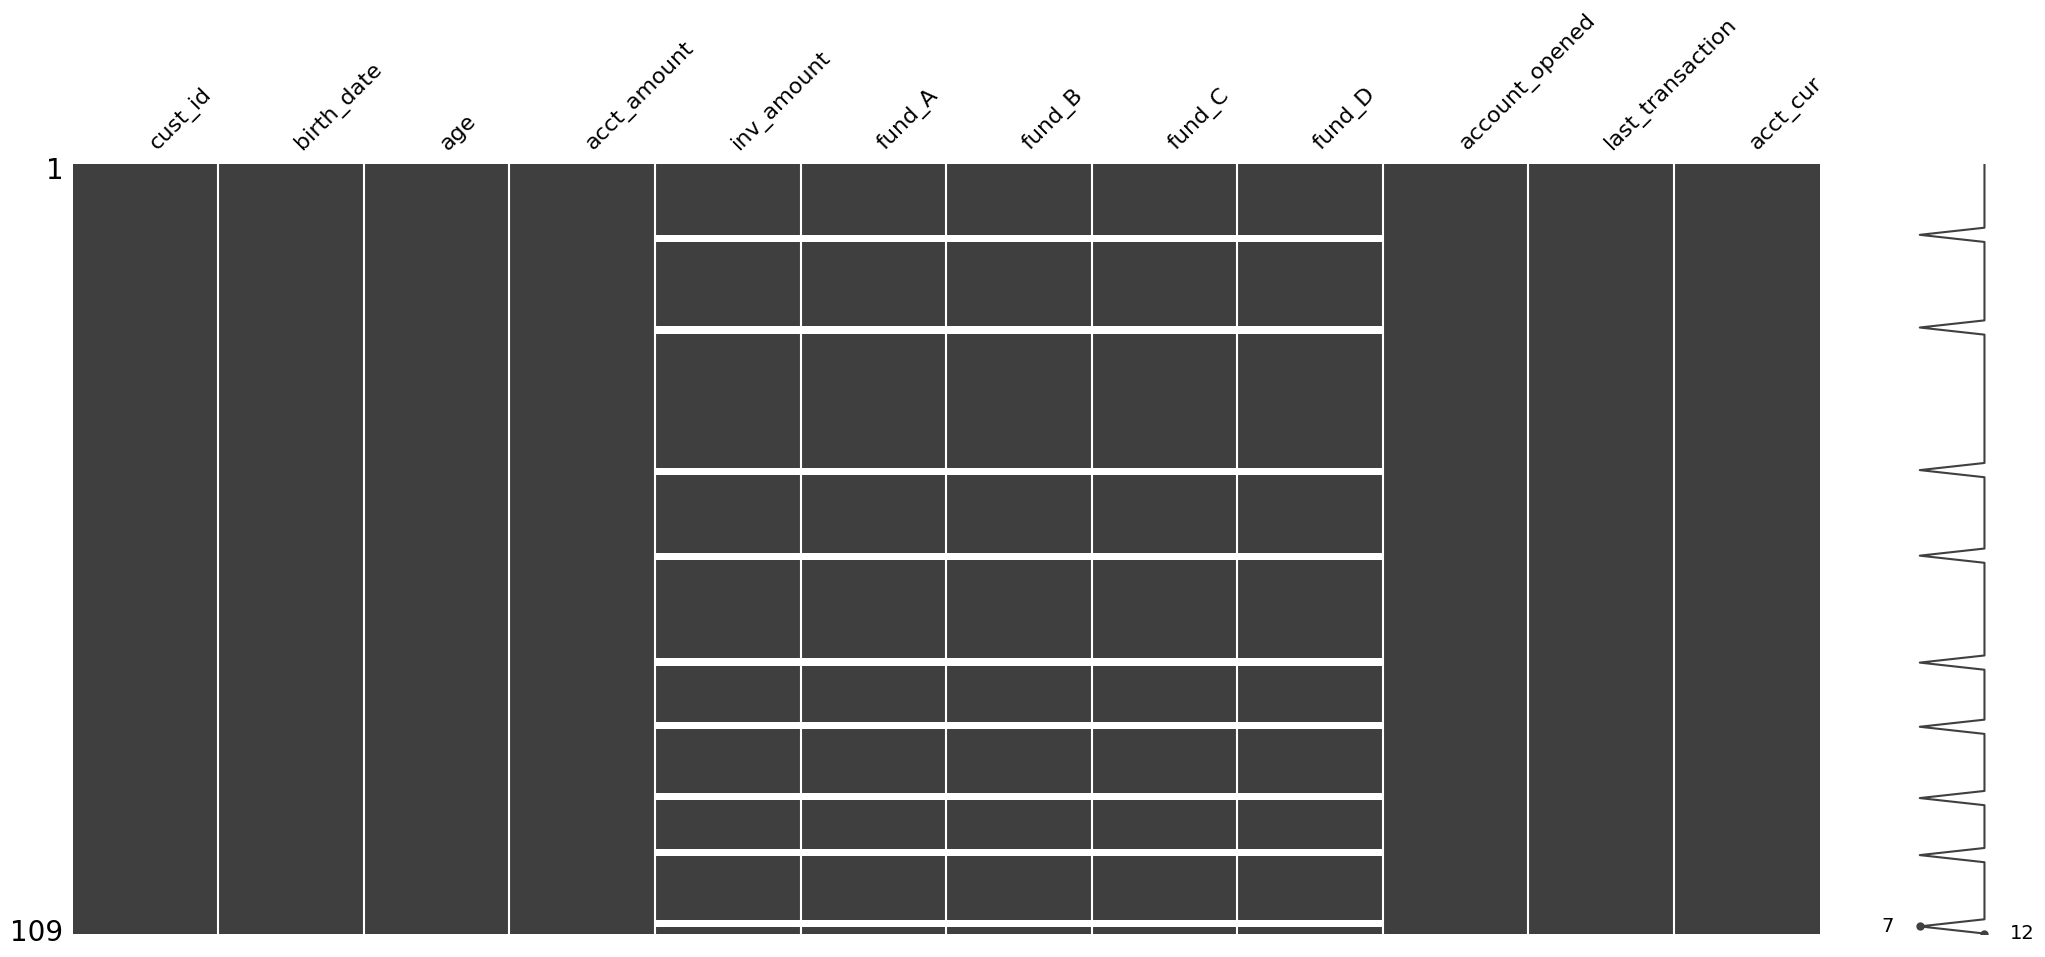

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

banking = pd.read_csv('files/banking.csv')

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

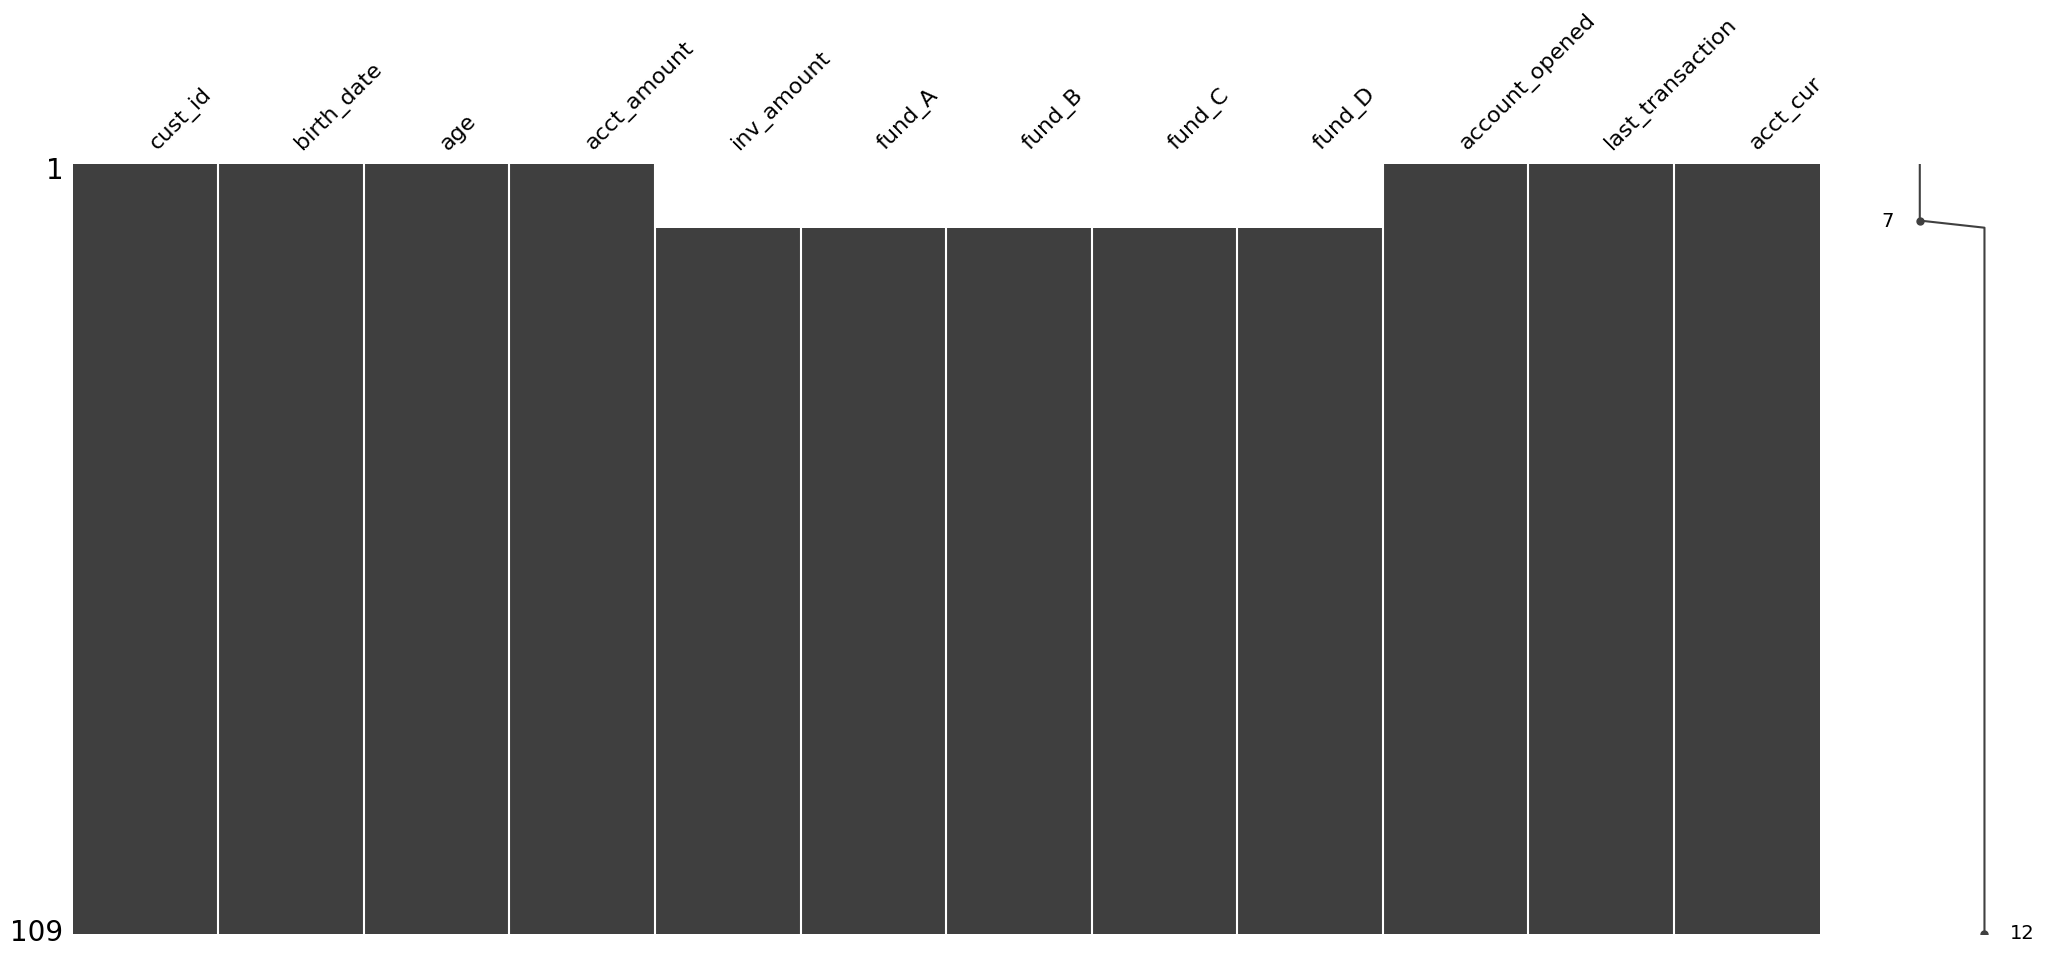

In [72]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by = 'age')
msno.matrix(banking_sorted)
plt.show()

#### Tracking the reason for the missing data

In [123]:
import pandas as pd

banking = pd.read_csv('files/banking.csv')

# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          9
fund_A              9
fund_B              9
fund_C              9
fund_D              9
account_opened      0
last_transaction    0
acct_cur            0
dtype: int64


### Comparing strings

#### Cuisine types

Addind noise to the cuisine types

In [11]:
import pandas as pd
import numpy as np

restaurants = pd.read_csv('files/restaurants_original.csv')

asian_variants = [
    'asian', 'asiane', 'asiann', 'asiian', 'asiaan', 'asianne', 'asiat'
]

italian_variants = [
    'italiann', 'italiano', 'italianne', 'italian', 'italiaan', 'italiian', 'itallian', 'italien', 'itali'
]

american_variants = [
    'americann', 'americano', 'ameerican', 'aamerican', 'ameriican', 'amerrican', 'ammericann', 'ameerrican',
    'ammereican', 'america', 'merican', 'murican', 'americen', 'americin', 'amerycan', 'amurican', 'american',
]

restaurants.loc[restaurants['cuisine_type'] == 'american','cuisine_type'] = restaurants['cuisine_type'].apply(lambda x: np.random.choice(american_variants))
restaurants.loc[restaurants['cuisine_type'] == 'italian','cuisine_type'] = restaurants['cuisine_type'].apply(lambda x: np.random.choice(italian_variants))
restaurants.loc[restaurants['cuisine_type'] == 'asian','cuisine_type'] = restaurants['cuisine_type'].apply(lambda x: np.random.choice(asian_variants))

In [22]:
import pandas as pd
from thefuzz import process

restaurants = pd.read_csv('files/restaurants.csv')

# Analyzing cuisine types
print(restaurants['cuisine_type'].unique())

['ammereican' 'merican' 'american' 'aamerican' 'americano' 'asiian'
 'italiano' 'asiat' 'italien' 'coffeebar' 'ameriican' 'asianne' 'america'
 'amerycan' 'americin' 'amerrican' 'ameerican' 'mexican' 'amurican'
 'italian' 'asiane' 'ameerrican' 'southwestern' 'steakhouses' 'americen'
 'murican' 'asiann' 'southern' 'americann' 'asiaan' 'itali' 'italiian'
 'itallian' 'ammericann' 'italianne' 'cajun' 'italiaan' 'asian' 'italiann']


#### Example of a string comparison

In [23]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit = restaurants.shape[0])

# Inspect the first 5 matches
print(matches[0:5])

[('italian', 100, 30), ('italian', 100, 41), ('italian', 100, 47), ('italian', 100, 64), ('italian', 100, 78)]


#### Remapping categories

In [20]:
categories = ['asian', 'american', 'italian']

# Iterate through categories
for cuisine in categories:
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())

['american' 'asian' 'italian' 'coffeebar' 'southwestern' 'steakhouses'
 'southern' 'cajun']


Generating pairs of restaurants

In [27]:
import pandas as pd
import recordlinkage

restaurants = pd.read_csv('files/restaurants.csv')
restaurants_new = pd.read_csv('files/restaurants_dirty.csv')

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

In [34]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city and cuisine_types
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
potential_matches

city  cuisine_type  name
2   0      0             1   0.0
    1      0             1   0.0
    7      0             1   0.0
    12     0             1   0.0
    13     0             1   0.0
...      ...           ...   ...
324 79     0             1   0.0
335 26     0             1   0.0
    65     0             1   0.0
    71     0             1   0.0
    79     0             1   0.0

[291 rows x 3 columns]

#### Linking matches

In [36]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

    Unnamed: 0                       name                       addr  \
0            0  arnie morton's of chicago   435 s. la cienega blv .    
1            1         art's delicatessen       12224 ventura blvd.    
2            2                  campanile       624 s. la brea ave.    
3            3                      fenix    8358 sunset blvd. west    
4            4         grill on the alley           9560 dayton way    
..         ...                        ...                        ...   
77          77                      feast        1949 westwood blvd.   
78          78                   mulberry        17040 ventura blvd.   
79          79                 matsuhissa   129 n. la cienega blvd.    
80          80                    jiraffe      502 santa monica blvd   
81          81                   martha's  22nd street grill 25 22nd   

                 city       phone cuisine_type  
0         los angeles  3102461501   ammereican  
1         studio city  8187621221    

/tmp/ipykernel_19360/2868928257.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_restaurants = restaurants.append(non_dup)
